In [4]:
#Importing libraries                                                                                                                                import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import netCDF4
import pandas as pd
import datetime
import scipy
import math
import matplotlib
import matplotlib.image as mpimg
from scipy import interpolate
import matplotlib.dates as mdates
from matplotlib import ticker
from scipy.stats import *
import locale
import time
locale.getlocale()
# locale.setlocale(locale.LC_TIME,'en_US.)
locale.setlocale(locale.LC_TIME,'en_US.utf8')
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
print(time.strftime("%d-%b-%Y"))

04-Sep-2022


USEFUL FUNCTIONS

In [5]:
#functions
def Language(g):
    global tunits,labeltM1,labelTS1,tlabel,Name
    if g=='RU':
        tunits='Относительная влажность %'
        labeltM1='WRF'
        labelTS1='наблюдение'  
        tlabel='Время суток'
        Name='NameRU'
        locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
    elif g=='EN':
        tunits='Relative humidity %' 
        labeltM1='WRF Data sfc'
        labelTS1='Observation'     
        tlabel='Hour'
        Name='Name'
        locale.setlocale(locale.LC_TIME,'en_US.utf8')
def GeneratingListOfVariables(file_nc):
    nc = netCDF4.Dataset(file_nc,'r+')
    #print(nc.variables.items())
    times = nc.variables['time']
    #print(times)
    jd = netCDF4.num2date(times[:],times.units)
    nc.close
    variables=list(nc.variables.keys())[3::]
    return nc.variables,variables
def Graphercore(i,Variable,vari):
            lat=np.array(Variable['lat'])
            lon=np.array(Variable['lon'])
            Coord2= np.argmin(np.abs(lon - LOND[i]))
            Coord1= np.argmin(np.abs(lat - LATD[i]))
            print(lat[Coord1],lon[Coord2],'Lee coordinates')
            Var=np.array(Variable[vari])
            Var=Variable[vari][:,Coord1,Coord2]
            if vari in ['tmpprs','tmpsfc','tm']:
                Var=Var-273.15
                units='Temperature (°C)'
            #date=Variable['time'].units.replace('minutes since ','')
            jd=pd.date_range(date,periods=len(Variable['time']),freq='H',name='Date')
            hs = pd.Series(Var,name=vari,index=jd) 
            return hs

LANGUAGE

In [15]:
LANG='EN'
Language(LANG)



INPUT DATA

In [16]:
date='2019-08-25 19:00';Date1='2019-08-26';Date2='2019-08-28';Date='20190826';Date3='2019-08-28 21:00'
date='2018-07-12 19:00';Date1='2018-07-13';Date2='2018-07-15';Date='20180713';Date3='2018-07-15 22:00'
path3='/home/usuario/Desktop/imagesTobeerased/'
ymin=0
ymax=100
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

PLOTTING STATIONS

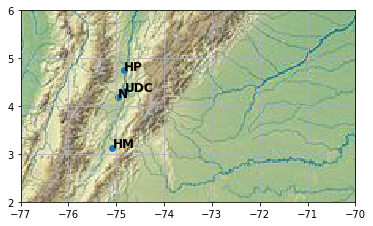

In [28]:
LATD=[]
LOND=[]
ALTD=[]
NAME=[]
Stations=[21235030,21255160,21185090,21115180]
for i in range(len(Stations)):
    i
    COD=Stations[i]
    St=pd.read_csv('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/DATA/DataProcessing/Stations.csv')#Opening file with coordinates of Stations
    NAME.append(str.title(St[St['Station']==COD]['Name'].values[0]))
    LATD.append(round(St.latitud[St['Station']==COD].values[0],2))
    LOND.append(round(-St[St['Station']==COD]['longitud'].values[0],2))
    ALTD.append(St[St['Station']==COD]['altitud'].values[0])
ST=pd.DataFrame({'Name':NAME,'Longitude':LOND,'Latitude':LATD,'Altitude':ALTD},index=Stations)
# F = [chr(ord('a') + x).upper() for x in ST.index]
ST.to_csv('StationsERAValidation.csv')
fig,ax=plt.subplots()
ax.imshow(mpimg.imread('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/WRFValidation/Colombia_relief_location_map.jpg'),extent=(-85.12,-66.44,-4.6,16.6))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylim([2,6])
plt.xlim([-77,-70])
plt.grid()
for i, txt in enumerate(NAME):
    f=''.join(c for c in str(txt) if c.isupper())
    ax.annotate(f, (LOND[i], LATD[i]),color='black',weight='bold',fontsize=12)
ax.scatter(LOND,LATD,label='Data Stations')
plt.show()


STATIONS AND COORDINATES

In [29]:
ST

,Name,Longitude,Latitude,Altitude
21235030,Universidad De Cundinamarca,-74.81,4.31,309
21255160,Hacienda Pajonales,-74.83,4.76,277
21185090,Nataima,-74.96,4.19,393
21115180,Hacienda Manila,-75.08,3.13,600


FUNCTION FOR:
    
    1. PLOTTING SIMULATED AND REAL DATA
    2. MAKING SCATTERPLOTTS
    3. FINDING CORRELATIONS,STANDARD DEVATIONS AND P-VALUES
    

In [30]:
def Plotting2(i):
    Language(LANG)
    Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
    Variable='HRA2_AUT_60@'
    StationT=str(Stations[i])
    TS=pd.read_csv(Path+Variable+StationT+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Station Data'],index_col='time')
    path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/WRF/'
    file1 = '/RH2M.nc' 
    fn1=path+Date+file1
    Variables,variables=GeneratingListOfVariables(fn1)
    vari='rh2m'
    Variables
    TM1=Graphercore(i,Variables,vari) 
    fig, ax = plt.subplots()
    ax.set_ylim([ymin, ymax])
    TM1.plot(ylabel=tunits,ax=ax,label='WRF Data sfc')
    TS[Date1:Date2].plot(ax=ax,xlim=[Date1,Date3])
    ax.set_xlabel(tlabel)
    ax.legend(loc='best',bbox_to_anchor=(1., 1.12))
    ax.get_legend().remove()
    string=Date+'RH2M'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
    TM1.corr(TS[Date1:Date2]['Station Data'])
    ST.loc[int(StationT),[r'$\rho$']]=round(TM1.corr(TS[Date1:Date2]['Station Data']),2)
    print(ST.loc[Stations[i]])
    x=TM1[Date1:Date3];
    y=TS[Date1:Date3]
    hh=x[x.index.isin(y.index)==True]
    SgM=round(y.std(),2)[0]
    SgD=round(hh.std(),2)
    ST.loc[int(StationT),[r'$\sigma_{d}$']]=SgD
    ST.loc[int(StationT),[r'$\sigma_{m}$']]=SgM
    fig2, ax2 = plt.subplots()
    ax2.set_xlabel(tunits);ax2.set_ylabel(tunits)
    ax2.set_xlim([0,100])
    ax2.set_ylim([0,100])
    ax2.scatter(hh,y,label=ST.loc[Stations[i]][Name])
    plt.legend()
    string=Date+'RH2M'+'Scatter'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
    plt.show()
    rho=TM1.corr(TS[Date1:Date2]['Station Data'])
    n=len(TS[Date1:Date3])-2
    tSt=rho*math.sqrt(n-2)/math.sqrt(1-rho**2)
    pval = t.sf(np.abs(tSt), n)*2
    ST.loc[int(StationT),[r'$p_{val}$']]=str(pval)[0:4]+str(pval)[-4::]


4.3251 -74.83038795986623 Lee coordinates
Name         Universidad De Cundinamarca 
Longitude                          -74.81
Latitude                             4.31
Altitude                              309
$\rho$                                0.7
Name: 21235030, dtype: object


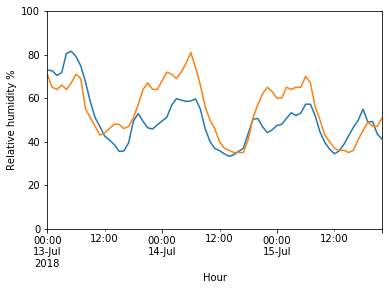

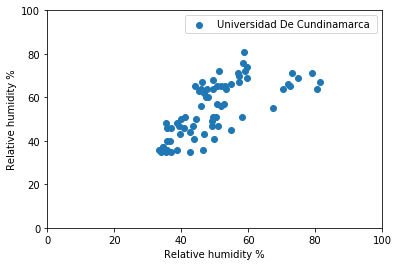

In [31]:
Plotting2(0)

4.7751 -74.83038795986623 Lee coordinates
Name            Hacienda Pajonales 
Longitude                    -74.83
Latitude                       4.76
Altitude                        277
$\rho$                         0.34
$\sigma_{d}$                    NaN
$\sigma_{m}$                    NaN
$p_{val}$                       NaN
Name: 21255160, dtype: object


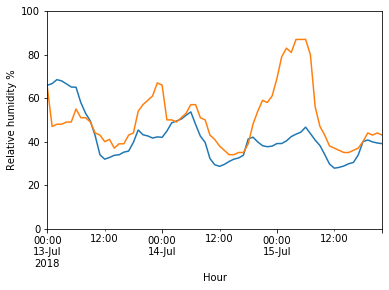

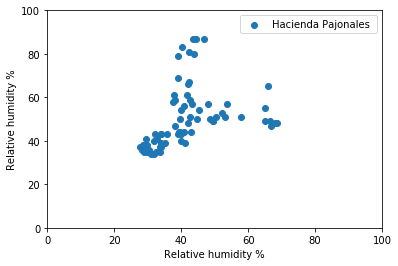

In [32]:
Plotting2(1)

4.19 -74.96581939799331 Lee coordinates
Name            Nataima 
Longitude         -74.96
Latitude            4.19
Altitude             393
$\rho$              0.81
$\sigma_{d}$         NaN
$\sigma_{m}$         NaN
$p_{val}$            NaN
Name: 21185090, dtype: object


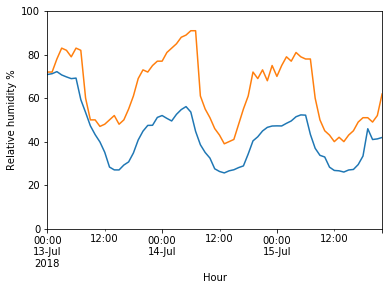

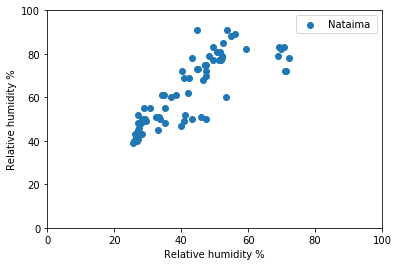

In [33]:
Plotting2(2)

3.1088 -75.1012508361204 Lee coordinates
Name            Hacienda Manila 
Longitude                 -75.08
Latitude                    3.13
Altitude                     600
$\rho$                      0.65
$\sigma_{d}$                 NaN
$\sigma_{m}$                 NaN
$p_{val}$                    NaN
Name: 21115180, dtype: object


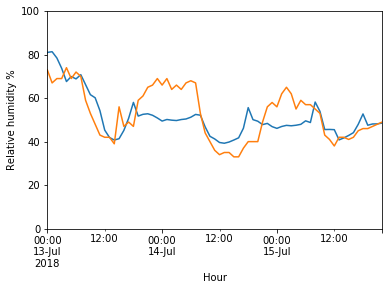

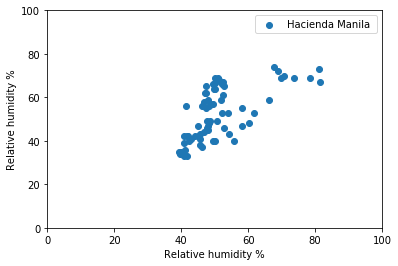

In [34]:
Plotting2(3)

In [36]:
ST

,Name,Longitude,Latitude,Altitude,$\rho$,$\sigma_{d}$,$\sigma_{m}$,$p_{val}$
21235030,Universidad De Cundinamarca,-74.81,4.31,309,0.70,11.97,12.67,1.43e-11
21255160,Hacienda Pajonales,-74.83,4.76,277,0.34,10.59,14.00,0.002283
21185090,Nataima,-74.96,4.19,393,0.81,13.19,15.74,3.18e-17
21115180,Hacienda Manila,-75.08,3.13,600,0.65,9.81,11.98,1.60e-09
